In [22]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
import catboost as cb
import numpy as np

In [5]:
train_data = pd.read_csv('../data/processed/train.csv')
test_data = pd.read_csv('../data/processed/X_test.csv')

In [6]:
train_data.columns = [column.replace(":", "_") for column in train_data.columns]
test_data.columns = [column.replace(":", "_") for column in test_data.columns]

In [7]:



train_lgb = lgb.Dataset(
    data=train_data[
        [column for column in train_data.columns if column != "pv_measurement"]
    ],
    label=train_data[["pv_measurement"]],
)

tss = TimeSeriesSplit(5) 
folds = tss.split(train_data) 

params = {
    'objective': "regression",  
    "max_depth": 27,
    "n_estimators": 180,
    "num_leaves": 69,
    "col_sample_bytree": 10e-1,
    "subsample": 10e-1,
    "reg_alpha": 5e-2,
    "reg_lambda": 0,
    "min_split_gain": 0,
    "min_child_samples": 39,
    "learning_rate": 6e-2,
}

# 27	180	69	10E-1	10E-1	5E-1	0	0	39	6E-2


model = lgb.LGBMRegressor(**params).fit(
    train_data[[column for column in train_data.columns if column != "pv_measurement"]],
    train_data[["pv_measurement"]],
)

[LightGBM] [Warning] Unknown parameter: col_sample_bytree


In [8]:
pd.DataFrame(model.predict(test_data)).to_csv("../data/processed/lgb_hypertune.csv", index=False)

In [141]:
cb_train_data = train_data.copy()
cb_train_data["location"] = np.where(cb_train_data["A"] == 1, "A", np.where(cb_train_data["B"] == 1, "B", "C"))
cb_train_data = cb_train_data.drop(["A", "B", "C"], axis=1)

cb_test_data = test_data.copy()
cb_test_data["location"] = np.where(cb_test_data["A"] == 1, "A", np.where(cb_test_data["B"] == 1, "B", "C"))
cb_test_data = cb_test_data.drop(["A", "B", "C"], axis=1)

cb_train_data["hour"] = (cb_train_data["hour"] * 23).round(0).astype(int)
cb_train_data["hours_since_11"] = np.abs(11 - cb_train_data["hour"])
cb_train_data["month"] = (cb_train_data["month"] * 11).round(0).astype(int)
cb_train_data["dayofweek"] = (cb_train_data["dayofweek"] * 6).round(0).astype(int)
cb_train_data["dayofmonth"] = (cb_train_data["dayofmonth"] * 30).round(0).astype(int)
cb_train_data["months_since_june"] = np.abs(6 - cb_train_data["month"])
cb_train_data["is_in_shadow_idx"] = cb_train_data["is_in_shadow_idx"].astype(bool)
cb_train_data["is_day_idx"] = cb_train_data["is_day_idx"].astype(bool)


In [130]:
cb_train_data.columns

Index(['absolute_humidity_2m_gm3', 'air_density_2m_kgm3',
       'clear_sky_energy_1h_J', 'clear_sky_rad_W', 'dew_or_rime_idx',
       'dew_point_2m_K', 'diffuse_rad_W', 'diffuse_rad_1h_J', 'direct_rad_W',
       'direct_rad_1h_J', 'effective_cloud_cover_p', 'fresh_snow_12h_cm',
       'fresh_snow_1h_cm', 'fresh_snow_24h_cm', 'fresh_snow_3h_cm',
       'fresh_snow_6h_cm', 'is_day_idx', 'is_in_shadow_idx',
       'msl_pressure_hPa', 'pressure_100m_hPa', 'prob_rime_p',
       'rain_water_kgm2', 'relative_humidity_1000hPa_p', 'sfc_pressure_hPa',
       'snow_depth_cm', 'snow_melt_10min_mm', 'snow_water_kgm2',
       'sun_elevation_d', 'super_cooled_liquid_water_kgm2', 't_1000hPa_K',
       'total_cloud_cover_p', 'visibility_m', 'wind_speed_10m_ms',
       'sun_azimuth_d_sin', 'sun_azimuth_d_cos', 'hour', 'dayofmonth',
       'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'pv_measurement',
       'location', 'hours_since_11', 'months_since_june'],
      dtype='object')

In [138]:
cb_train_data["dayofmonth"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,  0, 30])

<Axes: ylabel='Frequency'>

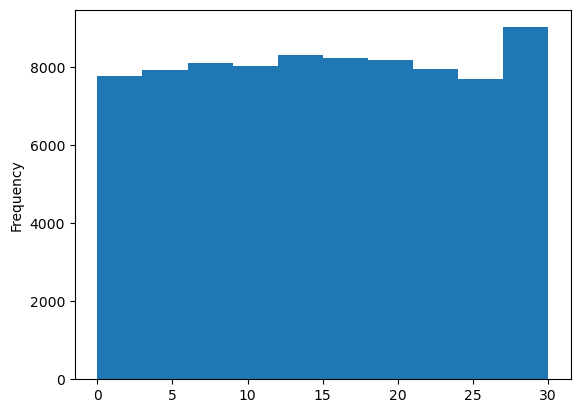

In [137]:
cb_train_data["dayofmonth"].plot(kind="hist")

In [65]:
cb_train_data.columns

Index(['absolute_humidity_2m_gm3', 'air_density_2m_kgm3',
       'clear_sky_energy_1h_J', 'clear_sky_rad_W', 'dew_or_rime_idx',
       'dew_point_2m_K', 'diffuse_rad_W', 'diffuse_rad_1h_J', 'direct_rad_W',
       'direct_rad_1h_J', 'effective_cloud_cover_p', 'fresh_snow_12h_cm',
       'fresh_snow_1h_cm', 'fresh_snow_24h_cm', 'fresh_snow_3h_cm',
       'fresh_snow_6h_cm', 'is_day_idx', 'is_in_shadow_idx',
       'msl_pressure_hPa', 'pressure_100m_hPa', 'prob_rime_p',
       'rain_water_kgm2', 'relative_humidity_1000hPa_p', 'sfc_pressure_hPa',
       'snow_depth_cm', 'snow_melt_10min_mm', 'snow_water_kgm2',
       'sun_elevation_d', 'super_cooled_liquid_water_kgm2', 't_1000hPa_K',
       'total_cloud_cover_p', 'visibility_m', 'wind_speed_10m_ms',
       'sun_azimuth_d_sin', 'sun_azimuth_d_cos', 'hour', 'dayofmonth',
       'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'pv_measurement',
       'location'],
      dtype='object')

In [ ]:
tss = TimeSeriesSplit(4) 
folds = tss.split(cb_train_data) 

In [143]:
pool = cb.Pool(
    data=cb_train_data[
        [column for column in cb_train_data.columns if not column in ["pv_measurement"]]
    ],
    cat_features=[
        "location",
        "hour",
        "month",
        "dayofweek",
        "dayofmonth",
        "is_day_idx",
        "is_in_shadow_idx",
    ],
    label=cb_train_data[["pv_measurement"]],
)

results = cb.cv(
    pool=pool,
    params={
        "eval_metric": "MAE",
        "loss_function": "MAE",
        "has_time": True,
        "one_hot_max_size": 24,
        # "iterations": 1000,
        "depth": 10,
        "learning_rate": 0.1,
        "l2_leaf_reg": 0.1,
        "border_count": 32,
        "bagging_temperature": 0.2,
        "random_strength": 0.2,
        "max_leaves": 31,
        # "grow_policy": "SymmetricTree",
        # "min_data_in_leaf": 1,
        # "bootstrap_type": "Bernoulli",
        # "subsample": 0.8,
    },
    # od_type="Iter",
    inverted=False,
    shuffle=False,
    stratified=False,
    as_pandas=True,
    plot=True,
    folds=tss,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 0.1039113	test: 0.1067371	best: 0.1067371 (0)	total: 40.5ms	remaining: 40.5s
1:	learn: 0.0948307	test: 0.0982310	best: 0.0982310 (1)	total: 61.4ms	remaining: 30.6s
2:	learn: 0.0883938	test: 0.0919655	best: 0.0919655 (2)	total: 80ms	remaining: 26.6s
3:	learn: 0.0814416	test: 0.0850681	best: 0.0850681 (3)	total: 101ms	remaining: 25.1s
4:	learn: 0.0757143	test: 0.0795098	best: 0.0795098 (4)	total: 119ms	remaining: 23.6s
5:	learn: 0.0705566	test: 0.0744533	best: 0.0744533 (5)	total: 133ms	remaining: 22.1s
6:	learn: 0.0658303	test: 0.0698978	best: 0.0698978 (6)	total: 150ms	remaining: 21.2s
7:	learn: 0.0617628	test: 0.0660658	best: 0.0660658 (7)	total: 166ms	remaining: 20.5s
8:	learn: 0.0583341	test: 0.0627469	best: 0.0627469 (8)	total: 182ms	remaining: 20.1s
9:	learn: 0.0551643	test: 0.0595742	best: 0.0595742 (9)	total: 200ms	remaining: 19.8s
10:	learn: 0.0522176	test: 0.0566588	best: 0.0566588 (10)	total: 216ms	remaining: 19.4s
11:	learn: 0.0495633	test: 0